### Que: Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)


In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df_normal = std.fit_transform(df)
df_normal

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_components = pd.DataFrame(pca.fit_transform(df_normal),columns=['a','b','c'])
pca_components.head()

,a,b,c
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829


C:\Users\Lenovo-PC\anaconda3\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


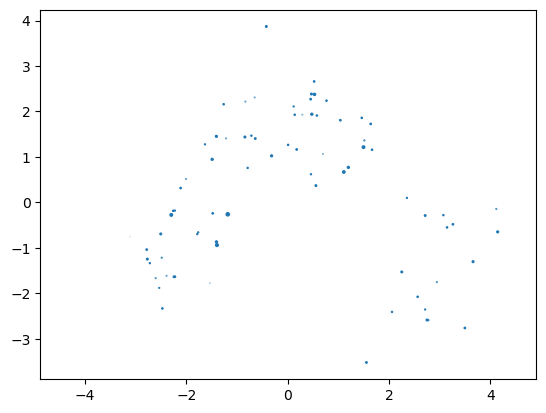

In [6]:
import matplotlib.pyplot as plt
plt.scatter(pca_components.a,pca_components.b,pca_components.c)

In [9]:
x = wine_data.drop(columns=['Type'])
y = wine_data['Type']

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

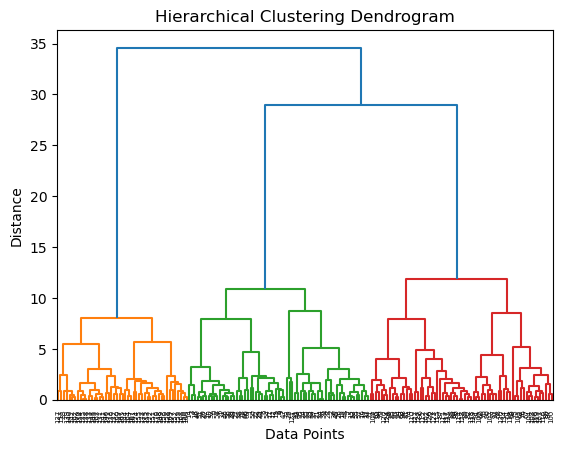

In [11]:
linkage_matrix = linkage(principal_df, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [12]:
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(principal_df)
    inertia_values.append(kmeans.inertia_)

C:\Users\Lenovo-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setti

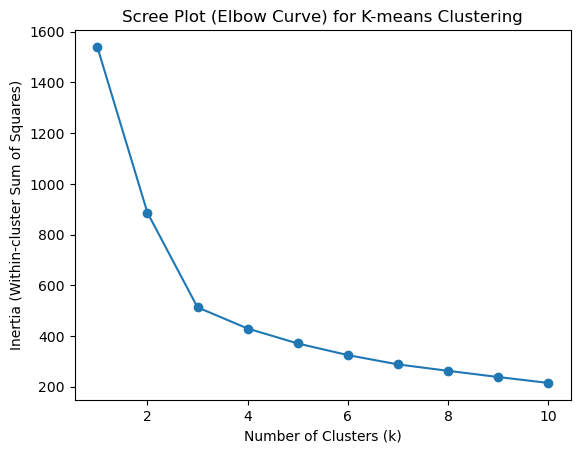

In [13]:
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Scree Plot (Elbow Curve) for K-means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.show()

In [14]:
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(principal_df)
cluster_labels_kmeans = kmeans_optimal.labels_


C:\Users\Lenovo-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
compare_df = pd.DataFrame({'Original Class': y, 'Cluster Labels (K-means)': cluster_labels_kmeans})
print(compare_df.value_counts())


Original Class  Cluster Labels (K-means)
2               2                           65
1               1                           59
3               0                           48
2               0                            3
                1                            3
dtype: int64


In [17]:
hierarchical_optimal = AgglomerativeClustering(n_clusters=optimal_k)
cluster_labels_hierarchical = hierarchical_optimal.fit_predict(principal_df)

In [18]:
compare_df_hierarchical = pd.DataFrame({'Original Class': y, 'Cluster Labels (Hierarchical)': cluster_labels_hierarchical})
print(compare_df_hierarchical.value_counts())

Original Class  Cluster Labels (Hierarchical)
2               0                                64
1               2                                59
3               1                                46
2               2                                 6
3               0                                 2
2               1                                 1
dtype: int64


###  Insights:
* The dendrogram illustrates the hierarchical structure of the wine samples based on the first three principal components.

* As we move up the dendrogram, samples are grouped together based on similarity.

* The elbow curve indicates that the rate of inertia reduction slows down significantly after 3 clusters.

* The "elbow point" suggests that 3 clusters are appropriate for capturing the variance in the data without   overcomplicating the model.

* The scatter plot visually confirms the separation of clusters in the reduced-dimensional space, supporting the choice of 3 clusters.
